# b33d and equilibrium selection rule

In [27]:
using BSON
using PrettyTables
using Statistics
using DataFrames
using Plots
using KernelDensity
using Distributions

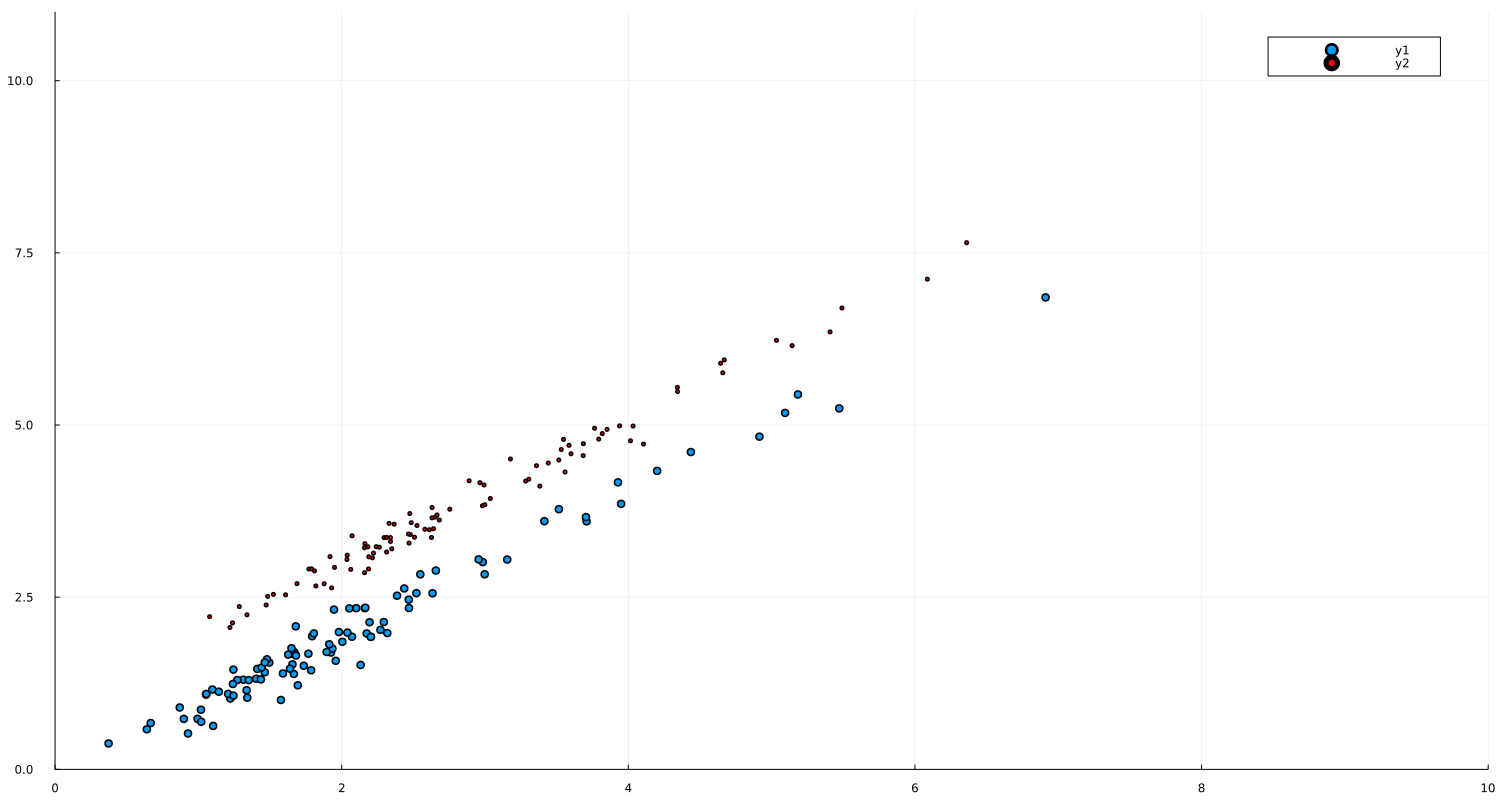

In [39]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt1/est_50_sim_50_dmod_1_01_01_1"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
scatter(est[:,1], est[:,2], ylims=(0,11), xlims=(0,10))
path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt1/est_100_sim_50_dmod_1_01_01_1"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
scatter!(est[:,1], est[:,2].+1.,  color=:red, markersize=2, size=(1500, 800))

In [53]:
R"""
library(mvnormalTest)
mhz($(est[:,1:2]))
"""
# plot(x->pdf(kde(est[:,1]), x), -2,10, color= :red, legends=false)


RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   1.1783    0.0129        NO 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9358 1e-04   No          
V2 0.9323 1e-04   No          



63.571195553370565


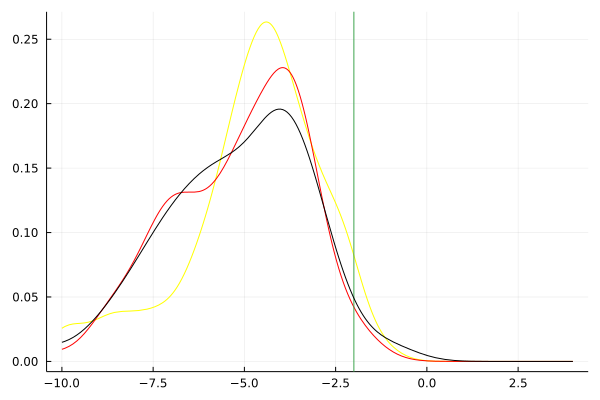

In [242]:
data_label = ["Price", "Matching", "Price & Matching"]


path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt7/est_100_sim_50_dmod_2"
res = BSON.load(path)

est = reduce(vcat, res["beta_hat"])
println(mean((est[:,1].-3).^2))
plot(x->pdf(kde(est[:,1]), x), -10,4, color= :yellow, legends=false)
# scatter(est[:,1], est[:2,2],  markersize= 2)


path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt7/est_200_sim_50_dmod_2"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
# println(mean((est[:,1].-3).^2))
# scatter!(est[:,1], est[:,2], lims=(-10,10), markersize= 2, color =:yellow)
plot!(x->pdf(kde(est[:,1]), x), -10,4, color= :red, legends=false)
vline!([-2])
# hline!([3])

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt7/est_300_sim_50_dmod_2"
res = BSON.load(path)

est = reduce(vcat, res["beta_hat"])
# println(mean((est[:,1].-3).^2))
plot!(x->pdf(kde(est[:,1]), x), -10,4, color= :black, legends=false)
# scatter!(est[:,1], est[:,2],  markersize= 2)






In [92]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT"
res = BSON.load(path)

est = reduce(vcat, res["beta_hat"])
# println(mean((est[:,1].-3).^2))
# plot(x->pdf(kde(est[:,1]), x), -10,4, color= :yellow, legends=false)
p1 = scatter(est[:,1], est[:,3],  markersize= 2)
best_est = zeros(96,3)
for i = 1:96
    best_est[i,:] = est[findmin(est[10*(i-1)+1: 10*i, 3])[2] + (i-1)*10, :]
end

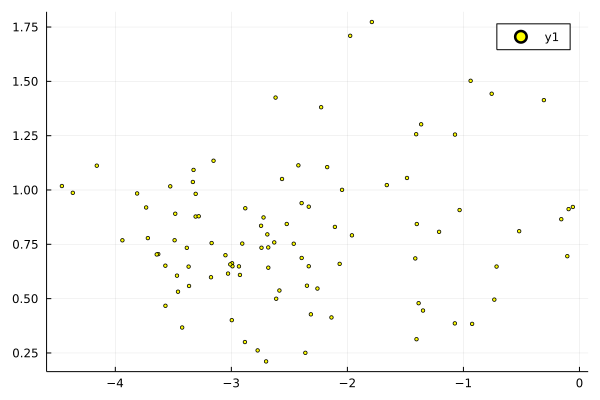

In [85]:
p2 = scatter!(best_est[:,1], best_est[:,3].,  markersize= 2, color=:yellow)

# plot(p1,p2, layout= (1,2))

In [103]:
sample(1:96, 50, replace = false)

20-element Vector{Int64}:
 78
 35
 29
 64
 13
 92
 32
 94
 21
 56
 85
 89
 75
 66
 90
  2
  8
 97
  5
 24

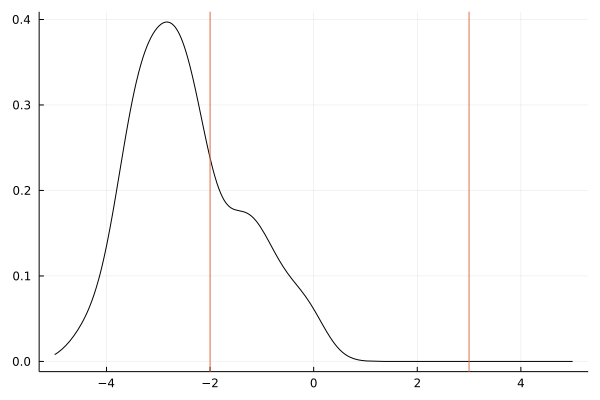

In [95]:
# i= 7
# scatter(est[50*(i-1)+1: 50*i, 1],est[50*(i-1)+1: 50*i, 3], markersize=3, xlims= (-5,0))

plot(x->pdf(kde(best_est[:,1]), x), color= :black, legends=false)
vline!([-2,3])


In [558]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT_50opt"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])

path1= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT_50_2opt"
res1 = BSON.load(path1)
est1= reduce(vcat, res1["beta_hat"])

path2= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt9/est_50_sim_50_dmod_3_HT_50_3opt"
res2 = BSON.load(path2)
est2 = reduce(vcat, res2["beta_hat"])

est = vcat(est, est1, est2)


# println(mean((est[:,1].-3).^2))
# plot(x->pdf(kde(est[:,1]), x), -10,4, color= :yellow, legends=false)

# p1 = scatter(est[:,1], est[:,3],  markersize= 2)
best_est = zeros((Int(size(est)[1]/50)),3)
for i = 1:Int(size(est)[1]/50)
    best_est[i,:] = est[findmin(est[50*(i-1)+1: 50*i, 3])[2] + (i-1)*50, :]
end

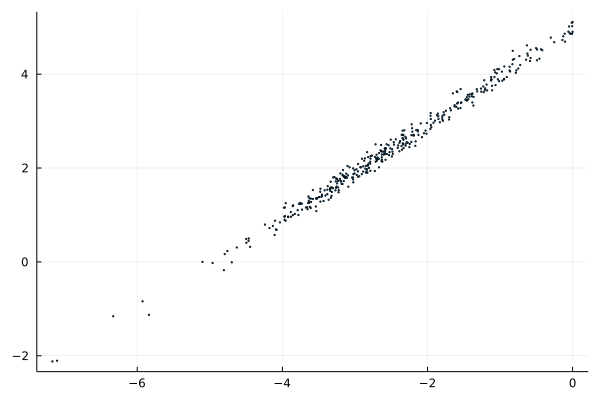

In [633]:
scatter(best_est[:,1],best_est[:,2], markersize = 1, legends =false)

In [608]:
sample_vec = sample(1:96*4, 100, replace = false)
R"""
library(mvnormalTest)
mhz($(best_est[sample_vec,1:2]))
"""



RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
     0.78     0.151       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.9769 0.0758  Yes         
V2 0.9746 0.0505  Yes         



correlation: 0.9925593828388152


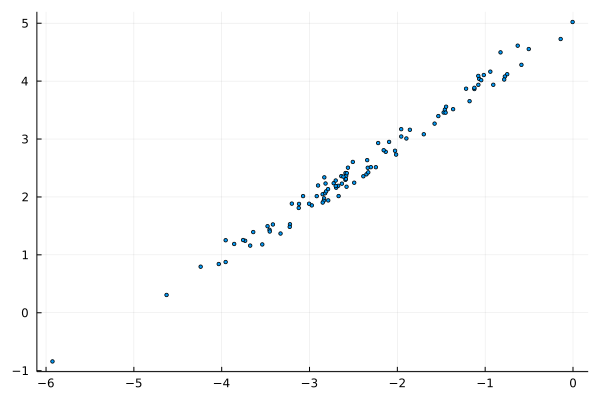

In [632]:
println("correlation: ", cor(best_est[sample_vec,1],best_est[sample_vec,2]))
scatter(best_est[sample_vec,1],best_est[sample_vec,2], legend= false, markersize = 2 )

In [575]:
tst = rand(MvNormal(zeros(2), [4 2*1*.99; 2*1*.99 1]), 100)' +1*rand(100,2)
R"""
library(mvnormalTest)
mhz($(tst))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.9168    0.0672       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.983  0.2266  Yes         
V2 0.9782 0.0954  Yes         



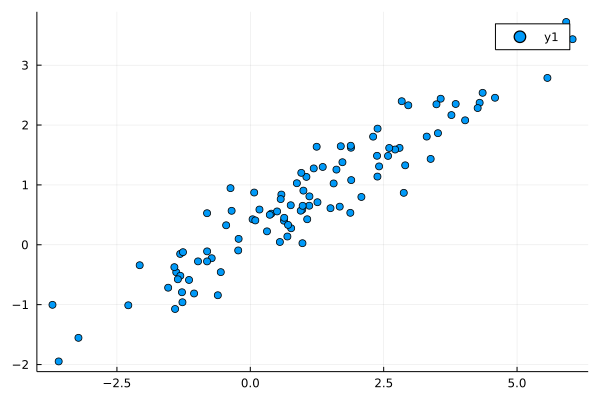

In [498]:
scatter(tst[:,1], tst[:,2])

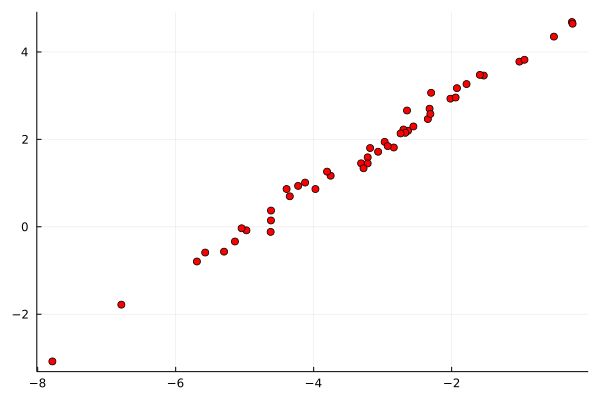

In [717]:

# path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt10/est_50_sim_500_dmod_3"
# res_200 = BSON.load(path_200)
# est_200 = reduce(vcat, res_200["beta_hat"])
# best_est_200 = zeros(24*2,3)
# for i = 1:24*2
#     best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
# end
# scatter(best_est_200[:,1], best_est_200[:,2], legends = false)
# # cor(est_200[:,1],est_200[:,2])
# cor(best_est_200[:,1],best_est_200[:,2])


## Bandwidth of price =.1
path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt12/est_50_sim_50_dmod_3"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
scatter(best_est_200[:,1], best_est_200[:,2], legends = false, color=:red)
# println(cor(best_est_200[:,1],best_est_200[:,2]))
# println(var(best_est_200[:,1]))

# # Bandwidth of price = 10*
# path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt12/est_50_sim_50_dmod_3_pr10"
# res_200 = BSON.load(path_200)
# est_200 = reduce(vcat, res_200["beta_hat"])
# best_est_200 = zeros(24*2,3)
# for i = 1:24*2
#     best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
# end

# println(cor(best_est_200[:,1],best_est_200[:,2]))
# println(var(best_est_200[:,1]))
# scatter!(best_est_200[:,1], best_est_200[:,2], legends = false, color=:yellow)

In [ ]:
# parameters 1 and 3 showing a similar pattern
path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt13/est_50_sim_50_dmod_3"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end

0.9589894064872097
0.23060603181071496
0.914674598450547
0.13049064598555524
0.9005610480275087
0.1567481216353192


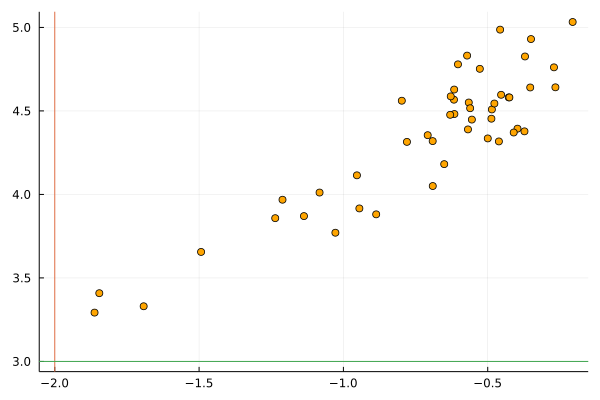

In [764]:

## changing the variance of unobservables


# path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt12/est_50_sim_50_dmod_3"
# res_200 = BSON.load(path_200)
# est_200 = reduce(vcat, res_200["beta_hat"])
# best_est_200 = zeros(24*2,3)
# for i = 1:24*2
#     best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
# end
# scatter(best_est_200[:,1], best_est_200[:,2], legends = false, color=:red)

# println(cor(best_est_200[:,1],best_est_200[:,2]))
# println(var(best_est_200[:,1]))

path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt14/est_50_sim_50_dmod_3_both_unobs"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
println(cor(best_est_200[:,1],best_est_200[:,2]))
println(var(best_est_200[:,1]))
scatter(best_est_200[:,1], best_est_200[:,2], legends = false, color=:yellow)


path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt14/est_50_sim_50_dmod_3_large_vars"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
println(cor(best_est_200[:,1],best_est_200[:,2]))
println(var(best_est_200[:,1]))
scatter!(best_est_200[:,1], best_est_200[:,2], legends = false, color=:blue)

path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/MCRES/limited_data_alt14/est_100_sim_50_dmod_3_larger_vars"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros(24*2,3)
for i = 1:24*2
    best_est_200[i,:] = est_200[findmin(est_200[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
println(cor(best_est_200[:,1],best_est_200[:,2]))
println(var(best_est_200[:,1]))
scatter(best_est_200[:,1], best_est_200[:,2], legends = false, color=:orange)

vline!([-2])
hline!([3])


In [765]:
R"""
library(mvnormalTest)
mhz($(best_est_200[:,1:2]))v
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   1.4142    0.0016        NO 

$uv.shapiro
   W     p-value UV.Normality
V1 0.838 0       No          
V2 0.934 0.0096  No          



0.7414817469412367
0.41740534150577485
[-1.252007357190669 3.1120385970976616 0.7316050589832818]
0.6795334591100616
0.35678980305355396
[-1.632606722051061 3.004813964048365 0.06619677434178885]


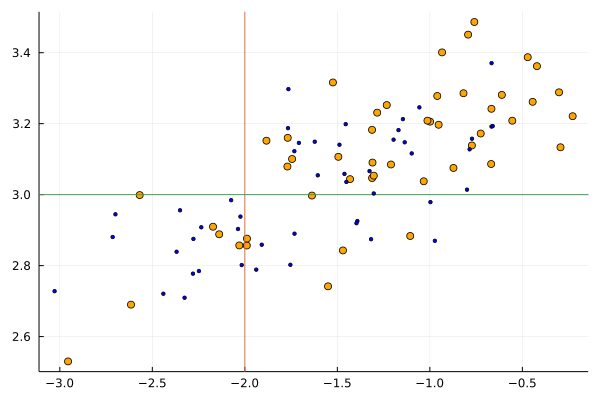

In [796]:
### UNIFORM DISTRIBUTION FOR UNOBSERVABLES 

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-01/est_50_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est = zeros(24*2,3)
for i = 1:24*2
    best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end
println(cor(best_est[:,1],best_est[:,2]))
println(var(best_est[:,1]))
scatter(best_est[:,1], best_est[:,2], legends = false, color=:orange)
println(mean(best_est, dims=1))
vline!([-2])
hline!([3])

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-01/est_100_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est = zeros(24*2,3)
for i = 1:24*2
    best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 3])[2] + (i-1)*2, :]
end

println(cor(best_est[:,1],best_est[:,2]))
println(var(best_est[:,1]))
println(mean(best_est, dims=1))

scatter!(best_est[:,1], best_est[:,2], legends = false, color=:blue, markersize = 2)



In [795]:
R"""
library(mvnormalTest)
mhz($(best_est[:,1:2]))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.4094     0.647       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.966  0.1754  Yes         
V2 0.9697 0.2475  Yes         



# 3 parameters

0.4718502078059661
0.3345692368463023
[2.9693536354403154 -0.7216092244331284 3.186868274619155 1.367683133784481]
0.6398859261916062
0.18257358841518131
[3.3833834005369456 -1.300202416015244 3.007156322995842 0.9462218411665378]


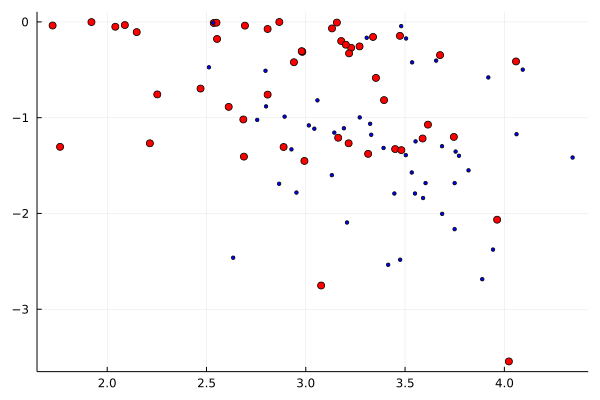

In [832]:

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-02/est_50_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est =est
# zeros(24*2,4)
# for i = 1:24*2
#     best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 4])[2] + (i-1)*2, :]
# end

println(cor(best_est[:,2],best_est[:,3]))
println(var(best_est[:,1]))
println(mean(best_est, dims=1))

scatter(best_est[:,1], best_est[:,2], legends = false, color=:red, markersize = 4)

                         

path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-02/est_100_sim_50_dmod_3"
res = BSON.load(path)
est = reduce(vcat, res["beta_hat"])
best_est =est
# zeros(24*2,4)
# for i = 1:24*2
#     best_est[i,:] = est[findmin(est[2*(i-1)+1: 2*i, 4])[2] + (i-1)*2, :]
# end

println(cor(best_est[:,2],best_est[:,3]))
println(var(best_est[:,1]))
println(mean(best_est, dims=1))

scatter!(best_est[:,1], best_est[:,2], legends = false, color=:blue, markersize = 2)



In [824]:
R"""
library(mvnormalTest)
mhz($(best_est[:,1:]))
"""


RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
   0.5388    0.7892       YES 

$uv.shapiro
   W      p-value UV.Normality
V1 0.985  0.7904  Yes         
V2 0.9781 0.5023  Yes         
V3 0.9697 0.2473  Yes         



In [773]:
x=rand(Normal(), 1000)
x=exp.(x)
R"""
library(mvnormalTest)
mhz($(x))
"""

RObject{VecSxp}
$mv.test
Statistic   p-value    Result 
 141.8499         0        NO 

$uv.shapiro
          W      p-value UV.Normality
statistic 0.5872 0       No          



In [345]:
cor(est[:,1],est[:,2] )

0.9965388240197662

In [314]:
findmax(best_est[:,1])

(2.2155374224684863, 16)

In [316]:
best_est[16,:]

3-element Vector{Float64}:
 2.2155374224684863
 7.303860500814747
 1.3557686632090211

In [318]:
est[15*50+1:16*50,:]

50×3 Matrix{Float64}:
 -2.73938   2.10451  1.41265
 -2.73938   2.10461  1.41265
 -0.25094   4.69304  1.40686
 -0.261154  4.68336  1.40517
 -0.872838  4.01614  1.42402
 -1.28036   3.59666  1.41977
 -0.261148  4.68341  1.40517
 -2.61307   2.223    1.41281
 -2.61307   2.2231   1.41281
 -1.28036   3.59666  1.41977
 -2.73938   2.10451  1.41265
 -0.261147  4.68283  1.40517
 -0.261159  4.68338  1.40517
  ⋮                  
 -0.872837  4.01597  1.42402
 -2.73938   2.10455  1.41265
 -0.27048   4.67242  1.40526
 -0.261161  4.68346  1.40517
 -0.261205  4.68347  1.40517
 -0.261154  4.68356  1.40517
 -0.888873  3.99632  1.42323
 -2.61307   2.2232   1.41281
  2.21554   7.30386  1.35577
 -0.26116   4.68346  1.40517
 -0.888875  3.99648  1.42323
 -0.261149  4.68337  1.40517